In [1]:
%pip install --quiet --upgrade pip jupysql ipywidgets ipympl duckdb duckdb-engine pandas matplotlib jupyterlab pyarrow numpy scipy statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import duckdb
import pandas as pd
import ipywidgets as widgets
from matplotlib import pyplot as plt, dates, ticker
import numpy as np
%load_ext sql
%matplotlib widget
conn = duckdb.connect()
%sql conn --alias duckdb
pd.options.mode.copy_on_write = True

In [3]:
%config SqlMagic.autopandas = True
%config SqlMagic.displaycon = False

In [4]:
%%sql
INSTALL sqlite;
LOAD sqlite;

,Success


In [5]:
%%sql
ATTACH '399978.db' AS expdb (TYPE SQLITE) ;
USE expdb.main;

,Success


In [6]:
# set some matplotlib defaults
from matplotlib.dates import DateFormatter, MinuteLocator, SecondLocator, MicrosecondLocator
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')
plt.rcParams['svg.fonttype'] = 'none'
# Set the global locator and formatter
plt.rcParams['date.autoformatter.microsecond'] = '%S.%f'  # Set the global format for microsecond level
plt.rcParams['date.autoformatter.second'] = '%H:%M:%S'  # Set the global format for second level
plt.rcParams['date.autoformatter.minute'] = '%H:%M'  # Set the global format for minute level
plt.rcParams['date.autoformatter.hour'] = '%Y-%m-%d %H:%M'  # Set the global format for hour level
plt.rcParams['date.autoformatter.day'] = '%Y-%m-%d %H:%M'  # Set the global format for day level
plt.rcParams['date.autoformatter.month'] = '%Y-%m-%d %H:%M'  # Set the global format for month level
plt.rcParams['date.autoformatter.year'] = '%Y-%m-%d %H:%M'  # Set the global format for year level


In [7]:
%sql SHOW;

,database,schema,name,column_names,column_types,temporary
0,expdb,main,Gateway,[gateway_id],[VARCHAR],False
1,expdb,main,Join_Message,"[join_message_id, app_received_at]","[BIGINT, TIMESTAMP]",False
2,expdb,main,Message,"[message_id, related_node, network_received_at]","[BIGINT, VARCHAR, TIMESTAMP]",False
3,expdb,main,Node,"[node_deveui, node_appeui, node_appkey, board_...","[VARCHAR, VARCHAR, VARCHAR, VARCHAR, VARCHAR, ...",False
4,expdb,main,Power_Consumption,"[power_consumption_id, node_id, timestamp, cur...","[BIGINT, VARCHAR, TIMESTAMP, DOUBLE, DOUBLE, D...",False
5,expdb,main,Radio,"[radio_id, timestamp, node_id, channel, rssi]","[BIGINT, TIMESTAMP, VARCHAR, BIGINT, BIGINT]",False
6,expdb,main,Site,[name],[VARCHAR],False
7,expdb,main,Trace,"[trace_id, node_id, timestamp, message]","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR]",False
8,expdb,main,Uplink_Message,"[uplink_message_id, through_gateway, gateway_r...","[BIGINT, VARCHAR, TIMESTAMP, TIMESTAMP, BIGINT...",False
9,expdb,main,sqlite_sequence,"[name, seq]","[BLOB, BLOB]",False


In [8]:
hej = %sql select message from expdb.Trace WHERE message LIKE 'TIMINGS>%'

In [9]:
%sql nodes =<< select distinct * from expdb.Node

,node_deveui,node_appeui,node_appkey,board_id,radio_chipset,node_site,profile,riot_board,failed
0,70B3D57ED005EA62,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
1,70B3D57ED005EA65,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
2,70B3D57ED005EA78,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
3,70B3D57ED005EA60,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
4,70B3D57ED005EA75,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
5,70B3D57ED005EA66,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
6,70B3D57ED005EA67,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
7,70B3D57ED005EA74,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
8,70B3D57ED005EA63,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
9,70B3D57ED005EA70,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0


In [10]:
%sql select node_id,count(*),min(timestamp),max(timestamp) from expdb.Power_Consumption group by node_id

,node_id,count_star(),"min(""timestamp"")","max(""timestamp"")"
0,70B3D57ED005EA63,1059347,2024-06-06 15:02:50.102208,2024-06-06 15:22:55.943402
1,70B3D57ED005EA70,1059557,2024-06-06 15:02:50.162490,2024-06-06 15:22:55.937803
2,70B3D57ED005EA62,1049569,2024-06-06 15:02:50.095505,2024-06-06 15:22:55.952840
3,70B3D57ED005EA65,1061053,2024-06-06 15:02:50.080553,2024-06-06 15:22:55.943380
4,70B3D57ED005EA77,1060802,2024-06-06 15:02:50.099033,2024-06-06 15:22:55.955055
5,70B3D57ED005EA59,1086626,2024-06-06 15:02:50.107199,2024-06-06 15:22:55.951871
6,70B3D57ED005EA66,1053753,2024-06-06 15:02:50.266026,2024-06-06 15:22:55.950804
7,70B3D57ED005EA75,1087504,2024-06-06 15:02:50.204827,2024-06-06 15:22:55.940075
8,70B3D57ED005EA61,1077405,2024-06-06 15:02:50.324401,2024-06-06 15:22:55.946107
9,70B3D57ED005EA68,1067904,2024-06-06 15:02:50.096130,2024-06-06 15:22:55.948827


In [11]:
nodes_with_queries = %sql SELECT node_id, count(*) FROM expdb.Trace WHERE Trace.message like 'Execute Queries%' GROUP BY Trace.node_id;
nodes_with_queries


,node_id,count_star()


In [12]:
power_consumption= %sql select timestamp,power,current,voltage,node_id from expdb.Power_Consumption
#filter to only contain results where we have a query
power_consumption = power_consumption[power_consumption["node_id"].isin(nodes_with_queries["node_id"])]
power_consumption = power_consumption.set_index("timestamp")
#power_consumption = power_consumption.sort_index()

groups = power_consumption.groupby("node_id")
groups.groups.keys()

dict_keys([])

/tmp/ipykernel_157833/4262331895.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
Locator attempting to generate 2881 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 17281 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2881 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2881 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 17281 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2881 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2881 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 17281 ticks ([0.0, ..., 1.0]), which excee

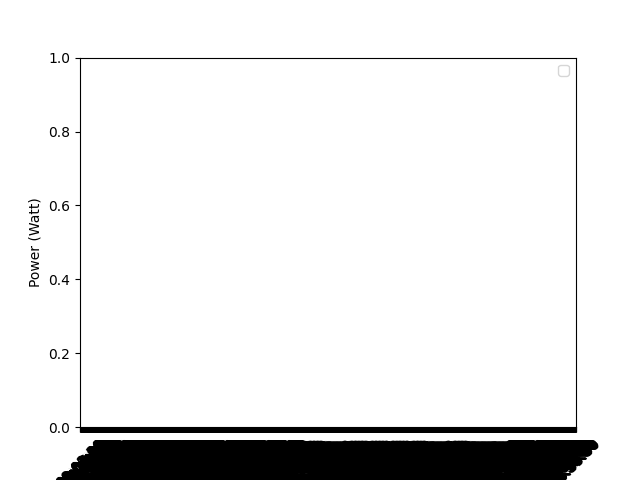

In [13]:
plt.figure()

for node_id, group in groups:
    idxs = np.linspace(0,len(group), 250, endpoint=False, dtype=int)

    subset = group["power"].iloc[idxs]
    plt.plot(subset.index, subset, label=node_id, linewidth=0.5)

plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.ylabel("Power (Watt)")
plt.gca().xaxis.set_major_locator(SecondLocator(interval=30))  # Set the major locator to display labels every 30 seconds
plt.gca().xaxis.set_minor_locator(SecondLocator(interval=5))  # Set the minor locator to display labels at millisecond level
plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M:%S')) 
#plt.gca().xaxis.set_minor_formatter(DateFormatter('%S.%f'))  
plt.legend()
plt.show()

## finding sync signals

In [14]:
BLINK_HIGH_MS = 200
BLINK_PRE_MS = 100
BLINK_POST_MS = 100

/tmp/ipykernel_157833/597624065.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


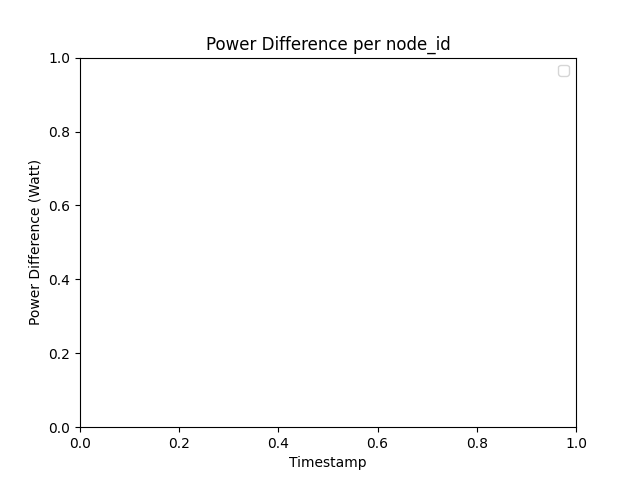

In [15]:
#diff of each group
power_consumption['power_diff'] = groups["power"].diff()


plt.figure()
for node_id, group in power_consumption.groupby("node_id"):
    idxs = np.linspace(0,len(group), 10000, endpoint=False, dtype=int) # there are comparatively few but big jumps, so hard to see when just taking "random" indexes
    subset = group["power_diff"].iloc[idxs]
    plt.plot(subset.index, subset, label=node_id, linewidth=0.5)
plt.title("Power Difference per node_id")
plt.xlabel("Timestamp")
plt.ylabel("Power Difference (Watt)")
plt.legend()
plt.show()

In [ ]:
rising_edge = power_consumption[power_consumption["power_diff"] > 0.1].copy()
rising_edge.loc[:,'direction'] = 'rising'
falling_edge = power_consumption[power_consumption["power_diff"] < -0.1].copy()
falling_edge.loc[:,'direction'] = 'falling'
edges = pd.concat([rising_edge, falling_edge], verify_integrity=True)
edges.sort_index(inplace=True)
edges.head()

,power,current,voltage,node_id,power_diff,direction
timestamp,,,,,,
2024-06-06 12:11:15.428327,0.446255,0.091790,4.85625,70B3D57ED005EA59,0.166049,rising
2024-06-06 12:11:15.629201,0.278375,0.057238,4.85875,70B3D57ED005EA59,-0.133693,falling
2024-06-06 12:11:15.831173,0.449307,0.092596,4.85625,70B3D57ED005EA59,0.169711,rising
2024-06-06 12:11:16.032047,0.277154,0.057067,4.85625,70B3D57ED005EA59,-0.134304,falling
2024-06-06 12:11:17.761064,0.277154,0.057042,4.85750,70B3D57ED005EA59,-0.137356,falling


Locator attempting to generate 2881 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).


In [ ]:
# populate edges with next direction and timestamps to later filter out edges that are too close to each other.
# need the index as dedicated column for this to be possible as a groupby transformation
edges['timestamp'] = edges.index.copy()
edges['next_direction'] = edges.groupby('node_id')['direction'].shift(-1)
edges['next_timestamp'] = edges.groupby('node_id')['timestamp'].shift(-1)
edges.head()

,power,current,voltage,node_id,power_diff,direction,timestamp,next_direction,next_timestamp
timestamp,,,,,,,,,
2024-06-06 12:11:15.428327,0.446255,0.091790,4.85625,70B3D57ED005EA59,0.166049,rising,2024-06-06 12:11:15.428327,falling,2024-06-06 12:11:15.629201
2024-06-06 12:11:15.629201,0.278375,0.057238,4.85875,70B3D57ED005EA59,-0.133693,falling,2024-06-06 12:11:15.629201,rising,2024-06-06 12:11:15.831173
2024-06-06 12:11:15.831173,0.449307,0.092596,4.85625,70B3D57ED005EA59,0.169711,rising,2024-06-06 12:11:15.831173,falling,2024-06-06 12:11:16.032047
2024-06-06 12:11:16.032047,0.277154,0.057067,4.85625,70B3D57ED005EA59,-0.134304,falling,2024-06-06 12:11:16.032047,falling,2024-06-06 12:11:17.761064
2024-06-06 12:11:17.761064,0.277154,0.057042,4.85750,70B3D57ED005EA59,-0.137356,falling,2024-06-06 12:11:17.761064,falling,2024-06-06 12:11:26.880033


In [ ]:
# now to filter out edges that are too close to each other or too far apart. We add 10% tolerance

# filter out edges that are too close to each other or too far apart. We add 10% tolerance
edges = edges[(edges['direction'] == "rising") & (edges['next_direction'] == "falling") & ((edges['next_timestamp'] - edges.index < pd.Timedelta(milliseconds=BLINK_HIGH_MS + (BLINK_HIGH_MS/10)))  & (edges['next_timestamp'] - edges.index > pd.Timedelta(milliseconds=BLINK_HIGH_MS - (BLINK_HIGH_MS/10))))]
edges.head()

,power,current,voltage,node_id,power_diff,direction,timestamp,next_direction,next_timestamp
timestamp,,,,,,,,,
2024-06-06 12:11:15.428327,0.446255,0.091790,4.85625,70B3D57ED005EA59,0.166049,rising,2024-06-06 12:11:15.428327,falling,2024-06-06 12:11:15.629201
2024-06-06 12:11:15.831173,0.449307,0.092596,4.85625,70B3D57ED005EA59,0.169711,rising,2024-06-06 12:11:15.831173,falling,2024-06-06 12:11:16.032047
2024-06-06 12:11:41.262704,0.493261,0.101607,4.85625,70B3D57ED005EA59,0.154449,rising,2024-06-06 12:11:41.262704,falling,2024-06-06 12:11:41.462449
2024-06-06 12:11:41.665551,0.496924,0.102291,4.85625,70B3D57ED005EA59,0.156891,rising,2024-06-06 12:11:41.665551,falling,2024-06-06 12:11:41.865296
2024-06-06 12:11:56.178059,0.499976,0.102877,4.85750,70B3D57ED005EA59,0.214275,rising,2024-06-06 12:11:56.178059,falling,2024-06-06 12:11:56.377804


In [ ]:
## add sync signal start and end times
edges.loc[:, 'sync_start'] = edges.index - pd.Timedelta(milliseconds=100)
edges.loc[:, 'sync_end'] = edges.next_timestamp + pd.Timedelta(milliseconds=100)
edges.head()

,power,current,voltage,node_id,power_diff,direction,timestamp,next_direction,next_timestamp,sync_start,sync_end
timestamp,,,,,,,,,,,
2024-06-06 12:11:15.428327,0.446255,0.091790,4.85625,70B3D57ED005EA59,0.166049,rising,2024-06-06 12:11:15.428327,falling,2024-06-06 12:11:15.629201,2024-06-06 12:11:15.328327,2024-06-06 12:11:15.729201
2024-06-06 12:11:15.831173,0.449307,0.092596,4.85625,70B3D57ED005EA59,0.169711,rising,2024-06-06 12:11:15.831173,falling,2024-06-06 12:11:16.032047,2024-06-06 12:11:15.731173,2024-06-06 12:11:16.132047
2024-06-06 12:11:41.262704,0.493261,0.101607,4.85625,70B3D57ED005EA59,0.154449,rising,2024-06-06 12:11:41.262704,falling,2024-06-06 12:11:41.462449,2024-06-06 12:11:41.162704,2024-06-06 12:11:41.562449
2024-06-06 12:11:41.665551,0.496924,0.102291,4.85625,70B3D57ED005EA59,0.156891,rising,2024-06-06 12:11:41.665551,falling,2024-06-06 12:11:41.865296,2024-06-06 12:11:41.565551,2024-06-06 12:11:41.965296
2024-06-06 12:11:56.178059,0.499976,0.102877,4.85750,70B3D57ED005EA59,0.214275,rising,2024-06-06 12:11:56.178059,falling,2024-06-06 12:11:56.377804,2024-06-06 12:11:56.078059,2024-06-06 12:11:56.477804


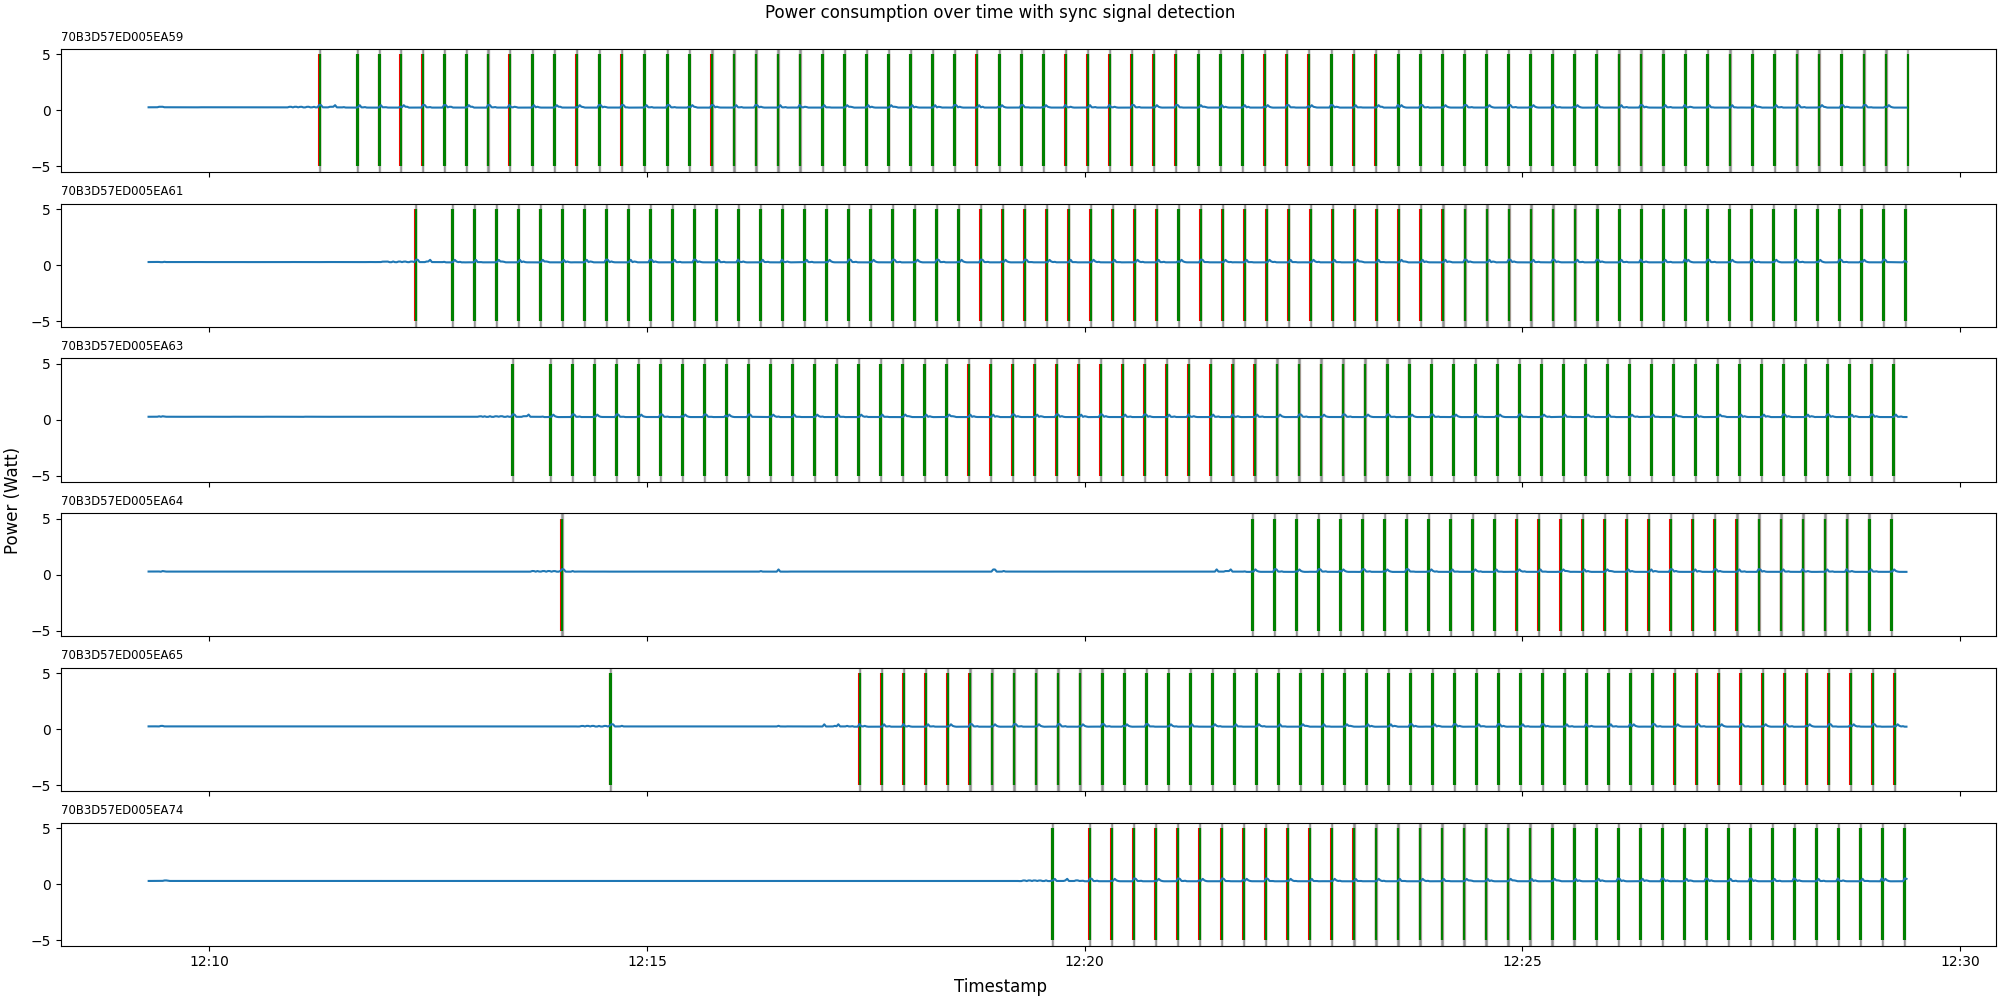

In [ ]:
groups_by_node_id = power_consumption.groupby('node_id')
edges_by_node_id = edges.groupby('node_id')

fig, axs = plt.subplots(len(groups_by_node_id), 1, sharex=True, sharey=True, layout='constrained', figsize=(20, 10))
fig.supxlabel("Timestamp")
fig.supylabel("Power (Watt)")
fig.suptitle("Power consumption over time with sync signal detection")
for ((node_id, group), ax) in zip(groups_by_node_id, axs):
    if node_id in edges_by_node_id.groups:
        edges_grouped = edges_by_node_id.get_group(node_id)
        ax.vlines(edges_grouped['timestamp'], ymin=-5, ymax=5, color='red')
        ax.vlines(edges_grouped['next_timestamp'], ymin=-5, ymax=5, color='green')
        for row in edges_by_node_id.get_group(node_id).itertuples():
            ax.axvspan(row.sync_start, row.sync_end, color='grey', alpha=0.5)

    else:
        print(f"Node {node_id} has no edges")
    idxs = np.linspace(0, len(group), endpoint=False, num=1000, dtype=int)
    subset = group["power"].iloc[idxs]
    ax.plot(subset.index, subset, label=node_id)
    ax.set_title(node_id, fontsize='small', loc='left')
plt.show()

In [ ]:
# every loop starts with 2 sync signals right after each other
# find all sync signals where the next start is very close to previous end
grouped = edges.groupby('node_id')
edges['next_sync_start'] = grouped['sync_start'].shift(-1)
edges['next_sync_end'] = grouped['sync_end'].shift(-1)
loops = edges[abs(edges['sync_end'] - edges['next_sync_start']) < pd.Timedelta(milliseconds=500)][['node_id', 'sync_start', 'next_sync_end']].copy()
loops.rename(columns={'sync_start': 'loop_signal_start', 'next_sync_end': 'loop_signal_end'}, inplace=True)
loops['loop_num'] = loops.groupby('node_id').cumcount()
loops[['node_id','loop_num']]


,node_id,loop_num
timestamp,,
2024-06-06 12:11:15.428327,70B3D57ED005EA59,0
2024-06-06 12:11:41.262704,70B3D57ED005EA59,1
2024-06-06 12:11:56.178059,70B3D57ED005EA59,2
2024-06-06 12:12:11.093414,70B3D57ED005EA59,3
2024-06-06 12:12:21.354739,70B3D57ED005EA61,0
...,...,...
2024-06-06 12:29:12.380178,70B3D57ED005EA64,30
2024-06-06 12:29:14.061672,70B3D57ED005EA63,62
2024-06-06 12:29:14.986901,70B3D57ED005EA65,48


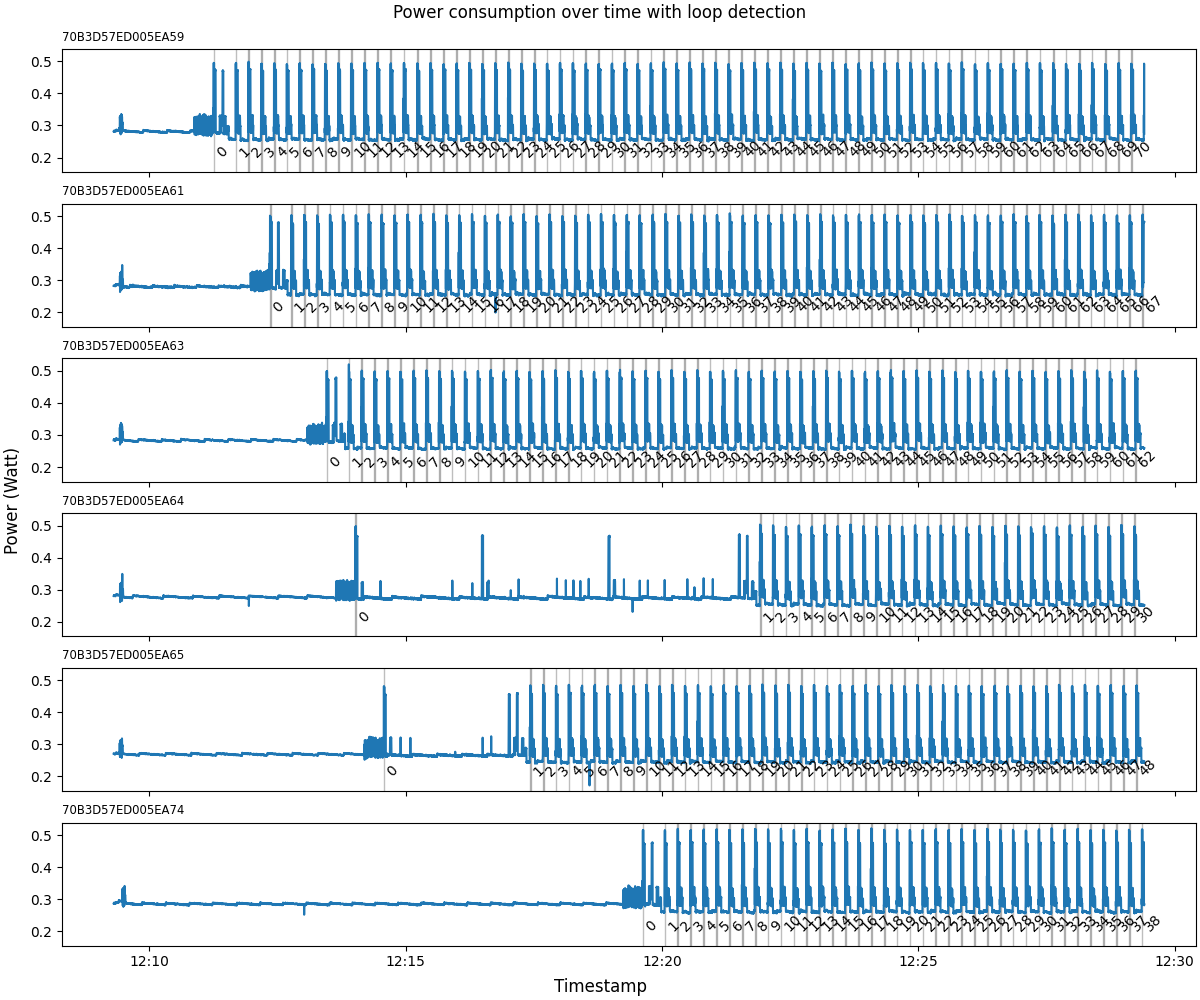

In [ ]:

groups_by_node_id = power_consumption.groupby('node_id')
loops_by_node_id = loops.groupby('node_id')
fig, axs = plt.subplots(len(groups_by_node_id), 1, sharex=True, sharey=True, figsize=(12, 10), layout='constrained')

fig.supxlabel("Timestamp")
fig.supylabel("Power (Watt)")
fig.suptitle("Power consumption over time with loop detection")
for ((node_id, group), ax) in zip(groups_by_node_id, axs):
    if node_id in loops_by_node_id.groups:
        loops_group = loops_by_node_id.get_group(node_id)
        for row in loops_group.itertuples():
            ax.axvspan(row.loop_signal_start, row.loop_signal_end, color='tab:gray', alpha=0.5, label="loop signal")
            ax.text(row.loop_signal_end, 0.2, f"{row.loop_num}", rotation=45)
    else:
        print(f"Node {node_id} has no loops")
    idxs = np.linspace(0, len(group), endpoint=False, num=10000, dtype=int)
    subset = group["power"].iloc[idxs]

    ax.plot(subset.index, subset,label=node_id)
    ax.set_title(node_id, fontsize='small', loc='left')

plt.show()

In [ ]:
%%sql timings << SELECT 
    node_id,
    timestamp,
    regexp_extract(message, 'Loop: (-?[0-9]+)',1) as loop_num,
    regexp_extract(message, '.*Sync: (-?[0-9]+)',1) as sync_time_ms,
    regexp_extract(message, '.*Load: (-?[0-9]+)',1) as load_time_ms,
    regexp_extract(message, '.*deserialize: (-?[0-9]+)',1) as deserialize_time_ms,
    regexp_extract(message, '.*sensor init: (-?[0-9]+)',1) as sensor_init_time_ms,
    regexp_extract(message, '.*net init: (-?[0-9]+)',1) as net_init_time_ms,
    --regexp_extract(message, '.*Listen: (-?[0-9]+)',1) as listen_time_ms,
    regexp_extract(message, '.*Collect: (-?[0-9]+)',1) as collect_time_ms,
    regexp_extract(message, '.*Exec: (-?[0-9]+)',1) as exec_time_ms,
    regexp_extract(message, '.*Send: (-?[0-9]+)',1) as send_time_ms,
    regexp_extract(message, '.*save config: (-?[0-9]+)',1) as save_config_time_ms,
    regexp_extract(message, '.*Sleep: (-?[0-9]+)',1) as sleep_time_s
FROM expdb.Trace
WHERE message LIKE 'TIMINGS>%'

In [ ]:
# 'TIMINGS> Loop: 0, Sync: 806 ms, Load: 40 ms, sensor init: 10 ms, env init: 0 ms, net init: 5216 ms, Collect: -1 ms, Exec: -1 ms, Send: 5119 ms, save config: 2646 ms, Sleep: 9 s\n'
timings['node_id'].unique()

array(['70B3D57ED005EA59', '70B3D57ED005EA61', '70B3D57ED005EA63',
       '70B3D57ED005EA60', '70B3D57ED005EA67', '70B3D57ED005EA65',
       '70B3D57ED005EA70', '70B3D57ED005EA71', '70B3D57ED005EA72',
       '70B3D57ED005EA69', '70B3D57ED005EA74', '70B3D57ED005EA62',
       '70B3D57ED005EA77', '70B3D57ED005EA64', '70B3D57ED005EA78',
       '70B3D57ED005EA73', '70B3D57ED005EA68'], dtype=object)

In [ ]:
# since duckdb return all columns as object we need to change types before we can merge
timings[['loop_num', 'sync_time_ms', 'load_time_ms', 'deserialize_time_ms', 'sensor_init_time_ms', 'net_init_time_ms', 'collect_time_ms', 'exec_time_ms', 'send_time_ms', 'save_config_time_ms', 'sleep_time_s']] = timings[['loop_num', 'sync_time_ms', 'load_time_ms', 'deserialize_time_ms', 'sensor_init_time_ms', 'net_init_time_ms', 'collect_time_ms', 'exec_time_ms', 'send_time_ms', 'save_config_time_ms', 'sleep_time_s']].apply(pd.to_numeric)

# .. and merge. here we need to reset index first, since df.merge doesnt preserve index
loops = loops.reset_index().merge(timings, on=['node_id', 'loop_num']).set_index('loop_signal_start')
loops.head()

,timestamp_x,node_id,loop_signal_end,loop_num,timestamp_y,sync_time_ms,load_time_ms,deserialize_time_ms,sensor_init_time_ms,net_init_time_ms,collect_time_ms,exec_time_ms,send_time_ms,save_config_time_ms,sleep_time_s
loop_signal_start,,,,,,,,,,,,,,,
2024-06-06 12:11:15.328327,2024-06-06 12:11:15.428327,70B3D57ED005EA59,2024-06-06 12:11:16.132047,0,2024-06-06 12:11:33.023641,806,21,3,25,9426,76,33,5848,1437,8
2024-06-06 12:11:41.162704,2024-06-06 12:11:41.262704,70B3D57ED005EA59,2024-06-06 12:11:41.965296,1,2024-06-06 12:11:46.939941,806,22,80,25,54,224,153,3860,533,9
2024-06-06 12:11:56.078059,2024-06-06 12:11:56.178059,70B3D57ED005EA59,2024-06-06 12:11:56.880650,2,2024-06-06 12:12:01.854981,806,22,80,25,54,223,154,3859,533,9
2024-06-06 12:12:10.993414,2024-06-06 12:12:11.093414,70B3D57ED005EA59,2024-06-06 12:12:11.796036,3,2024-06-06 12:12:16.770322,806,22,80,25,54,223,154,3860,533,9
2024-06-06 12:12:21.254739,2024-06-06 12:12:21.354739,70B3D57ED005EA61,2024-06-06 12:12:22.057879,0,2024-06-06 12:12:41.951722,806,21,3,25,8425,77,33,9848,1439,4


In [ ]:

loops["start_time"] = loops.index
loops["sync_start"] = loops["start_time"]
loops["sync_end"] = loops["sync_start"] + pd.to_timedelta(loops["sync_time_ms"], unit="ms")
loops["load_start"] = loops["sync_end"]
loops["load_end"] = loops["load_start"] + pd.to_timedelta(loops["load_time_ms"], unit="ms")
loops["deserialize_start"] = loops["load_end"]
loops["deserialize_end"] = loops["deserialize_start"] + pd.to_timedelta(loops["deserialize_time_ms"], unit="ms")
loops["sensor_init_start"] = loops["deserialize_end"]
loops["sensor_init_end"] = loops["sensor_init_start"] + pd.to_timedelta(loops["sensor_init_time_ms"], unit="ms")
loops["net_init_start"] = loops["sensor_init_end"]
loops["net_init_end"] = loops["net_init_start"] + pd.to_timedelta(loops["net_init_time_ms"], unit="ms")
loops["collect_time_start"] = loops["net_init_end"]
loops["collect_time_end"] = loops["collect_time_start"] +pd.to_timedelta(loops["collect_time_ms"], unit="ms")
loops["exec_start"] = loops["collect_time_end"]
loops["exec_end"] = loops["exec_start"] + pd.to_timedelta(loops["exec_time_ms"], unit="ms")
loops["send_start"] = loops["exec_end"]
loops["send_end"] = loops["send_start"] +pd.to_timedelta(loops["send_time_ms"], unit="ms")
loops["save_config_start"] = loops["send_end"]
loops["save_config_end"] = loops["save_config_start"] + pd.to_timedelta(loops["save_config_time_ms"], unit="ms")
loops["sleep_start"] = loops["save_config_end"]
loops["sleep_end"] = loops["sleep_start"] + pd.to_timedelta(loops["sleep_time_s"], unit="s")

loops.replace(-1,0) # remove -1 values. They show up if the time measurement is not available



,timestamp_x,node_id,loop_signal_end,loop_num,timestamp_y,sync_time_ms,load_time_ms,deserialize_time_ms,sensor_init_time_ms,net_init_time_ms,...,collect_time_start,collect_time_end,exec_start,exec_end,send_start,send_end,save_config_start,save_config_end,sleep_start,sleep_end
loop_signal_start,,,,,,,,,,,,,,,,,,,,,
2024-06-06 12:11:15.328327,2024-06-06 12:11:15.428327,70B3D57ED005EA59,2024-06-06 12:11:16.132047,0,2024-06-06 12:11:33.023641,806,21,3,25,9426,...,2024-06-06 12:11:25.609327,2024-06-06 12:11:25.685327,2024-06-06 12:11:25.685327,2024-06-06 12:11:25.718327,2024-06-06 12:11:25.718327,2024-06-06 12:11:31.566327,2024-06-06 12:11:31.566327,2024-06-06 12:11:33.003327,2024-06-06 12:11:33.003327,2024-06-06 12:11:41.003327
2024-06-06 12:11:41.162704,2024-06-06 12:11:41.262704,70B3D57ED005EA59,2024-06-06 12:11:41.965296,1,2024-06-06 12:11:46.939941,806,22,80,25,54,...,2024-06-06 12:11:42.149704,2024-06-06 12:11:42.373704,2024-06-06 12:11:42.373704,2024-06-06 12:11:42.526704,2024-06-06 12:11:42.526704,2024-06-06 12:11:46.386704,2024-06-06 12:11:46.386704,2024-06-06 12:11:46.919704,2024-06-06 12:11:46.919704,2024-06-06 12:11:55.919704
2024-06-06 12:11:56.078059,2024-06-06 12:11:56.178059,70B3D57ED005EA59,2024-06-06 12:11:56.880650,2,2024-06-06 12:12:01.854981,806,22,80,25,54,...,2024-06-06 12:11:57.065059,2024-06-06 12:11:57.288059,2024-06-06 12:11:57.288059,2024-06-06 12:11:57.442059,2024-06-06 12:11:57.442059,2024-06-06 12:12:01.301059,2024-06-06 12:12:01.301059,2024-06-06 12:12:01.834059,2024-06-06 12:12:01.834059,2024-06-06 12:12:10.834059
2024-06-06 12:12:10.993414,2024-06-06 12:12:11.093414,70B3D57ED005EA59,2024-06-06 12:12:11.796036,3,2024-06-06 12:12:16.770322,806,22,80,25,54,...,2024-06-06 12:12:11.980414,2024-06-06 12:12:12.203414,2024-06-06 12:12:12.203414,2024-06-06 12:12:12.357414,2024-06-06 12:12:12.357414,2024-06-06 12:12:16.217414,2024-06-06 12:12:16.217414,2024-06-06 12:12:16.750414,2024-06-06 12:12:16.750414,2024-06-06 12:12:25.750414
2024-06-06 12:12:21.254739,2024-06-06 12:12:21.354739,70B3D57ED005EA61,2024-06-06 12:12:22.057879,0,2024-06-06 12:12:41.951722,806,21,3,25,8425,...,2024-06-06 12:12:30.534739,2024-06-06 12:12:30.611739,2024-06-06 12:12:30.611739,2024-06-06 12:12:30.644739,2024-06-06 12:12:30.644739,2024-06-06 12:12:40.492739,2024-06-06 12:12:40.492739,2024-06-06 12:12:41.931739,2024-06-06 12:12:41.931739,2024-06-06 12:12:45.931739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-06 12:29:06.999801,2024-06-06 12:29:07.099801,70B3D57ED005EA61,2024-06-06 12:29:07.802972,66,2024-06-06 12:29:12.952716,806,22,80,25,54,...,2024-06-06 12:29:07.986801,2024-06-06 12:29:08.210801,2024-06-06 12:29:08.210801,2024-06-06 12:29:08.364801,2024-06-06 12:29:08.364801,2024-06-06 12:29:12.399801,2024-06-06 12:29:12.399801,2024-06-06 12:29:12.933801,2024-06-06 12:29:12.933801,2024-06-06 12:29:21.933801
2024-06-06 12:29:08.789051,2024-06-06 12:29:08.889051,70B3D57ED005EA59,2024-06-06 12:29:09.591642,70,2024-06-06 12:29:14.740971,806,22,80,25,54,...,2024-06-06 12:29:09.776051,2024-06-06 12:29:10.000051,2024-06-06 12:29:10.000051,2024-06-06 12:29:10.153051,2024-06-06 12:29:10.153051,2024-06-06 12:29:14.190051,2024-06-06 12:29:14.190051,2024-06-06 12:29:14.723051,2024-06-06 12:29:14.723051,2024-06-06 12:29:23.723051
2024-06-06 12:29:12.280178,2024-06-06 12:29:12.380178,70B3D57ED005EA64,2024-06-06 12:29:13.082555,30,2024-06-06 12:29:18.234823,806,22,80,25,54,...,2024-06-06 12:29:13.267178,2024-06-06 12:29:13.490178,2024-06-06 12:29:13.490178,2024-06-06 12:29:13.644178,2024-06-06 12:29:13.644178,2024-06-06 12:29:17.680178,2024-06-06 12:29:17.680178,2024-06-06 12:29:18.214178,2024-06-06 12:29:18.214178,2024-06-06 12:29:27.214178


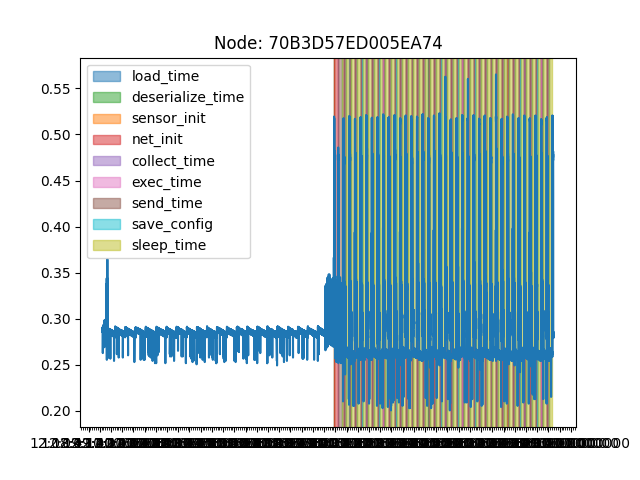

In [ ]:
node_id = nodes_with_queries.iloc[0]["node_id"]
timing_data = loops[loops["node_id"] == node_id]
power_data = power_consumption[power_consumption["node_id"] == node_id]

plt.figure()
plt.plot(power_data.index, power_data["power"])
for row in timing_data.itertuples():
    plt.axvspan(row.load_start, row.load_end, color='tab:blue', alpha=0.5, label="load_time")
    plt.axvspan(row.deserialize_start, row.deserialize_end, color='tab:green', alpha=0.5, label="deserialize_time")
    plt.axvspan(row.sensor_init_start, row.sensor_init_end, color='tab:orange', alpha=0.5, label="sensor_init")
    plt.axvspan(row.net_init_start, row.net_init_end, color='tab:red', alpha=0.5, label="net_init")
    plt.axvspan(row.collect_time_start, row.collect_time_end, color='tab:purple', alpha=0.5, label="collect_time")
    plt.axvspan(row.exec_start, row.exec_end, color='tab:pink', alpha=0.5, label="exec_time")
    plt.axvspan(row.send_start, row.send_end, color='tab:brown', alpha=0.5, label="send_time")
    plt.axvspan(row.save_config_start, row.save_config_end, color='tab:cyan', alpha=0.5, label="save_config")
    plt.axvspan(row.sleep_start, row.sleep_end, color='tab:olive', alpha=0.5, label="sleep_time")
# this to remove duplicate labels https://stackoverflow.com/questions/13588920/stop-matplotlib-repeating-labels-in-legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.gca().xaxis.set_major_locator(SecondLocator(interval=30))
plt.gca().xaxis.set_minor_locator(SecondLocator(interval=5))
plt.title(f"Node: {node_id}")
plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M:%S.%f'))  # Set the date format for the tick labels
plt.show()


## Add events if any

In [ ]:
# get all relevant frame-events
%sql send_frame_start << select * from expdb.Trace WHERE message LIKE '%send frame%'
%sql send_frame_end << select * from expdb.Trace WHERE message LIKE '%Transmission completed%'
%sql receive_frame_start << select * from expdb.Trace WHERE message LIKE '%RX started%'
%sql receive_frame_end << select * from expdb.Trace WHERE message LIKE '%received something%'

print(f"{len(send_frame_start)} send frame start events. {len(send_frame_end)} end events. {len(receive_frame_start)} receive frame start events. {len(receive_frame_end)} end events.")

0 send frame start events. 0 end events. 0 receive frame start events. 0 end events.


In [ ]:
#drop first row of send_frame_end and receive_frame_start since thats from the join procedure
send_frame_end = send_frame_end.iloc[1:]
receive_frame_start = receive_frame_start.iloc[1:]

# confirm the 2 pairs of start/end all have the same length
assert len(send_frame_start) == len(send_frame_end), f"send frame event mismatch. start {len(send_frame_start)}, end { len(send_frame_end)}"
assert len(receive_frame_start) == len(receive_frame_end), f"receive frame event mismatch  {len(receive_frame_start)}, end { len(receive_frame_end)}"

In [ ]:
# add send and receive columns to plot
#TODO: update this to support more nodes
# for send_start_row, send_end_row in zip(send_frame_start.itertuples(), send_frame_end.itertuples()):
#     start_time = send_start_row.timestamp
#     end_time = send_end_row.timestamp
#     plt.axvspan(start_time, end_time, color='tab:pink', alpha=0.5, label="send_events")

# for receive_frame_start, receive_frame_end in zip(receive_frame_start.itertuples(), receive_frame_end.itertuples()):
#     start_time = receive_frame_start.timestamp
#     end_time = receive_frame_end.timestamp
#     plt.axvspan(start_time, end_time, color='tab:brown', alpha=0.5, label="receive_events")


# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())

# plt.show()

In [ ]:
%sql SELECT * from expdb.Content_Message

,content_message_id,frame_counter,frame_port,frame_payload
0,1,-1,1,CmwKagpoCmQKAggBCgIQAAoCCAAKAhAICgIICgoCCAEKAh...
1,2,1,2,CgA=
2,3,33,2,CgA=
3,4,19,2,CgA=
4,5,42,2,CgA=
...,...,...,...,...
252,261,10,2,PDM=
253,262,38,2,CgA=
254,263,67,2,CgA=
255,264,15,2,PDM=


In [ ]:
%%sql
SELECT
    through_gateway,
    gateway_received_at,
    app_received_at,
    rssi,
    snr,
    bandwidth,
    frequency,
    consumed_airtime_s,
    spreading_factor,
    coding_rate,
    frame_counter,
    frame_port,
    frame_payload,
    from_base64(frame_payload) as decoded_payload,
    related_node,
    network_received_at
FROM
    expdb.Uplink_Message,
    expdb.Content_Message,
    expdb.Message 
WHERE
    Uplink_Message.uplink_message_id = Message.message_id AND
    Content_Message.content_message_id = Message.message_id

,through_gateway,gateway_received_at,app_received_at,rssi,snr,bandwidth,frequency,consumed_airtime_s,spreading_factor,coding_rate,frame_counter,frame_port,frame_payload,decoded_payload,related_node,network_received_at
0,gw-tetech-test,2024-06-06 12:21:57,2024-06-06 12:21:57.332043,-123,-7.80,125000,868300000,1.155072,SF12,4/5,1,2,CgA=,"[10, 0]",70B3D57ED005EA64,2024-06-06 12:21:57.125969
1,iot-lab-saclay-gateway,2024-06-06 12:21:58,2024-06-06 12:21:59.194023,-45,9.75,125000,868300000,1.155072,SF12,4/5,33,2,CgA=,"[10, 0]",70B3D57ED005EA63,2024-06-06 12:21:58.983526
2,iot-lab-saclay-gateway,2024-06-06 12:21:59,2024-06-06 12:22:00.076118,-34,12.00,125000,868100000,1.155072,SF12,4/5,19,2,CgA=,"[10, 0]",70B3D57ED005EA65,2024-06-06 12:21:59.868867
3,iot-lab-saclay-gateway,2024-06-06 12:22:05,2024-06-06 12:22:06.067700,-40,2.50,125000,868100000,1.155072,SF12,4/5,42,2,CgA=,"[10, 0]",70B3D57ED005EA59,2024-06-06 12:22:05.860508
4,gw-tetech-test,2024-06-06 12:22:06,2024-06-06 12:22:06.569202,-123,-8.00,125000,868300000,1.155072,SF12,4/5,9,2,CgA=,"[10, 0]",70B3D57ED005EA74,2024-06-06 12:22:06.361060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,iot-lab-saclay-gateway,2024-06-06 12:28:23,2024-06-06 12:28:24.591053,-27,8.75,125000,868300000,1.155072,SF12,4/5,63,2,CgA=,"[10, 0]",70B3D57ED005EA61,2024-06-06 12:28:24.384750
189,gw-tetech-test,2024-06-06 12:28:44,2024-06-06 12:28:44.308863,-122,-8.50,125000,868100000,1.155072,SF12,4/5,3,2,PDM=,"[60, 51]",70B3D57ED005EA68,2024-06-06 12:28:44.098421
190,gw-tetech-test,2024-06-06 12:23:49,2024-06-06 12:23:49.312782,-119,-10.00,125000,868100000,1.155072,SF12,4/5,4,2,PDM=,"[60, 51]",70B3D57ED005EA62,2024-06-06 12:23:49.107354
191,iot-lab-saclay-gateway,2024-06-06 12:26:21,2024-06-06 12:26:22.715863,-33,8.75,125000,867500000,1.155072,SF12,4/5,0,2,PDM=,"[60, 51]",70B3D57ED005EA68,2024-06-06 12:26:22.511843


## experiment stats
with sync signals and events mapped we can see some stats on the experiments

In [ ]:
%%sql
select * from expdb.Node

,node_deveui,node_appeui,node_appkey,board_id,radio_chipset,node_site,profile,riot_board,failed
0,70B3D57ED005EA59,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
1,70B3D57ED005EA60,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
2,70B3D57ED005EA61,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
3,70B3D57ED005EA62,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
4,70B3D57ED005EA63,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
5,70B3D57ED005EA64,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
6,70B3D57ED005EA65,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
7,70B3D57ED005EA66,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
8,70B3D57ED005EA67,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
9,70B3D57ED005EA68,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0


In [ ]:
loops.groupby('node_id')['loop_num'].max()

node_id
70B3D57ED005EA59    70
70B3D57ED005EA61    66
70B3D57ED005EA63    62
70B3D57ED005EA64    30
70B3D57ED005EA65    48
70B3D57ED005EA74    37
Name: loop_num, dtype: int64

## Calculate Total Energy Consumed per region

In [ ]:
np.sum((np.abs(np.diff(power_consumption.index.to_numpy())) / np.timedelta64(1, 's')) * power_consumption["power"].values[:-1])

4145.248838887695

In [ ]:
#define function to calculate energy consumed

def calc_energy_consumed(df: pd.DataFrame):

    # create a copy of the dataframe with only index and power
    if len(df) == 0:
        return 0
    #     # ensure we only calculate for data frames containing data from a single node
    # assert len(df["node_id"].unique()) == 1, "energy consumption only supported for single node"

    # # assert df have columns "power" and index of "timestamp" type
    # assert "power" in df.columns, "power column not found"
    # assert isinstance(df.index, pd.DatetimeIndex), "index is not  of type pd.DatetimeIndex"
    times = df.index.array
    powers = df["power"].values

    #power["power_diff"] = power.diff().shift(-1) #  current - previous, shifted one back so it becomes next - current. i.e. current + diff = next
    time_diff= np.abs(np.diff(times)) # abs(next-current)
    time_diff_s = time_diff / np.timedelta64(1, 's') # get timediff in fractions of a second
    powers = powers[:-1] # drop last row since it has no next and doesnt match up with the time_diff
    return np.sum(powers * time_diff_s) # returns the sum of power times fractions of a second. Since power is in W and time_diff_s is in seconds it is in W*s or J


In [ ]:
# loops contain the start and end times of each activity, so loop over loops and calculate the energy for each activity
def calc_energy_consumed_per_activity(series_loops: pd.Series) -> pd.Series:
    power_consumption_for_node = power_consumption[(power_consumption["node_id"] == series_loops["node_id"])]
    return pd.Series({
        "node_id": series_loops["node_id"],
        "loop_num": series_loops["loop_num"],
        "total": calc_energy_consumed(power_consumption_for_node.loc[series_loops.name:series_loops["sleep_end"]]),
        "loop signal": calc_energy_consumed(power_consumption_for_node.loc[series_loops.name:series_loops["loop_signal_end"]]),
        "total without loop signal": calc_energy_consumed(power_consumption_for_node.loc[series_loops["loop_signal_end"]:series_loops["sleep_end"]]),
        "load config": calc_energy_consumed(power_consumption_for_node.loc[series_loops["load_start"]:series_loops["load_end"]]),
        "deserialize": calc_energy_consumed(power_consumption_for_node.loc[series_loops["deserialize_start"]:series_loops["deserialize_end"]]),
        "sensor init": calc_energy_consumed(power_consumption_for_node.loc[series_loops["sensor_init_start"]:series_loops["sensor_init_end"]]),
        "net init": calc_energy_consumed(power_consumption_for_node.loc[series_loops["net_init_start"]:series_loops["net_init_end"]]),
        "sensor collect": calc_energy_consumed(power_consumption_for_node.loc[series_loops["collect_time_start"]:series_loops["collect_time_end"]]),
        "query execution": calc_energy_consumed(power_consumption_for_node.loc[series_loops["exec_start"]:series_loops["exec_end"]]),
        "send": calc_energy_consumed(power_consumption_for_node.loc[series_loops["send_start"]:series_loops["send_end"]]),
        "save config": calc_energy_consumed(power_consumption_for_node.loc[series_loops["save_config_start"]:series_loops["save_config_end"]]),
        "sleep": calc_energy_consumed(power_consumption_for_node.loc[series_loops["sleep_start"]:series_loops["sleep_end"]]),
    })
energy_consumed = loops.apply(calc_energy_consumed_per_activity, axis=1)
energy_consumed_summary = energy_consumed.describe()
energy_consumed_summary

,loop_num,total,loop signal,total without loop signal,load config,deserialize,sensor init,net init,sensor collect,query execution,send,save config,sleep
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,28.191223,4.879737,0.309870,4.569551,0.005978,0.022631,0.006944,0.581311,0.063991,0.044067,1.395850,0.163049,2.282157
std,18.405063,7.505677,0.005474,7.505916,0.000205,0.003090,0.000193,7.472442,0.005941,0.004839,0.212681,0.034284,0.210372
min,0.000000,2.838247,0.297421,2.536900,0.005359,0.000331,0.006644,0.014832,0.021173,0.009247,1.185483,0.151638,0.883905
25%,13.000000,4.306930,0.307693,3.996211,0.005812,0.023003,0.006826,0.015224,0.064493,0.044443,1.364837,0.157767,2.285474
50%,26.000000,4.330314,0.310514,4.017689,0.005982,0.023180,0.006879,0.015472,0.065051,0.044845,1.386951,0.159018,2.305439
75%,42.000000,4.366731,0.312442,4.054948,0.006188,0.023329,0.007051,0.015678,0.065583,0.045164,1.395070,0.159954,2.331065
max,70.000000,131.502417,0.321923,131.193983,0.006316,0.023727,0.007494,126.775213,0.066831,0.046162,3.075726,0.430518,2.584746


In [ ]:
import scipy.stats as st
import statsmodels.stats.api as smstats

def calc_confidence_interval(series: pd.Series) -> pd.Series:
    low, high = smstats.DescrStatsW(series).tconfint_mean(alpha=0.05)
    #low, high = st.norm.interval(0.95, loc=series["mean"], scale=series["std"])
    return pd.Series({
        "low": low,
        "high": high
    })



In [ ]:
energy_consumed

,node_id,loop_num,total,loop signal,total without loop signal,load config,deserialize,sensor init,net init,sensor collect,query execution,send,save config,sleep
loop_signal_start,,,,,,,,,,,,,,
2024-06-06 12:11:15.328327,70B3D57ED005EA59,0,7.789147,0.310527,7.478295,0.005904,0.000331,0.007224,3.041571,0.021977,0.009577,1.904552,0.423522,2.060394
2024-06-06 12:11:41.162704,70B3D57ED005EA59,1,4.288152,0.308994,3.978840,0.005860,0.023395,0.006856,0.015558,0.065347,0.044404,1.364230,0.158603,2.291007
2024-06-06 12:11:56.078059,70B3D57ED005EA59,2,4.312724,0.310714,4.001689,0.005902,0.023571,0.006894,0.015666,0.065385,0.045003,1.370472,0.159529,2.305658
2024-06-06 12:12:10.993414,70B3D57ED005EA59,3,4.298958,0.307681,3.990964,0.005828,0.023268,0.006808,0.015466,0.064578,0.044474,1.358153,0.157643,2.311185
2024-06-06 12:12:21.254739,70B3D57ED005EA61,0,7.565538,0.310895,7.254330,0.005864,0.000649,0.006827,2.722618,0.022350,0.009472,3.035372,0.426179,1.021723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-06 12:29:06.999801,70B3D57ED005EA61,66,4.307325,0.312086,3.994912,0.006224,0.023170,0.006868,0.015279,0.064873,0.044868,1.389014,0.158251,2.283097
2024-06-06 12:29:08.789051,70B3D57ED005EA59,70,4.332550,0.306850,4.025374,0.005804,0.023538,0.006928,0.015736,0.065987,0.044804,1.392035,0.159596,2.307361
2024-06-06 12:29:12.280178,70B3D57ED005EA64,30,3.565485,0.308938,3.256245,0.006002,0.022994,0.006890,0.015148,0.064227,0.044598,1.371430,0.156941,1.564219


In [ ]:
error_bounds = energy_consumed[["total", "total without loop signal", "loop signal", "load config", "deserialize", "sensor init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]].apply(calc_confidence_interval)


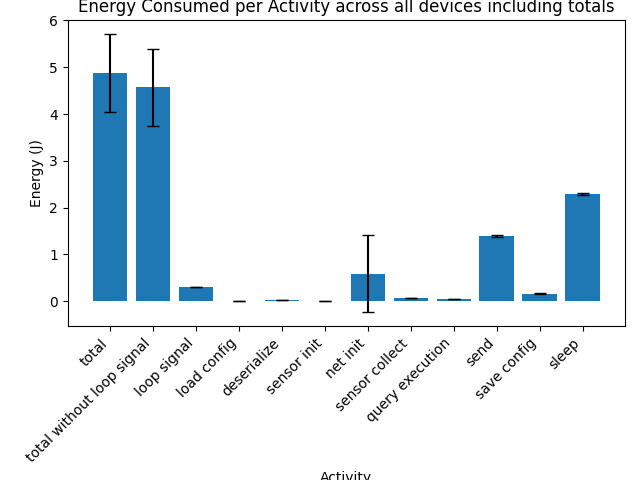

In [ ]:
# plot barchart with stddev error bars
plt.figure()
to_plot = energy_consumed_summary[["total", "total without loop signal", "loop signal", "load config", "deserialize", "sensor init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]]

## since error_bounds are absolute and matplotlib likes them relative, we need to substract the mean to get relative error - and take the absolute to flip
## the sign on the lower bound
error_relative = np.abs(error_bounds - to_plot.loc["mean"])

plt.bar(to_plot.columns, to_plot.loc["mean"], yerr=error_relative,capsize=4)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.xlabel("Activity")
plt.ylabel("Energy (J)")
plt.title("Energy Consumed per Activity across all devices including totals")
plt.show()

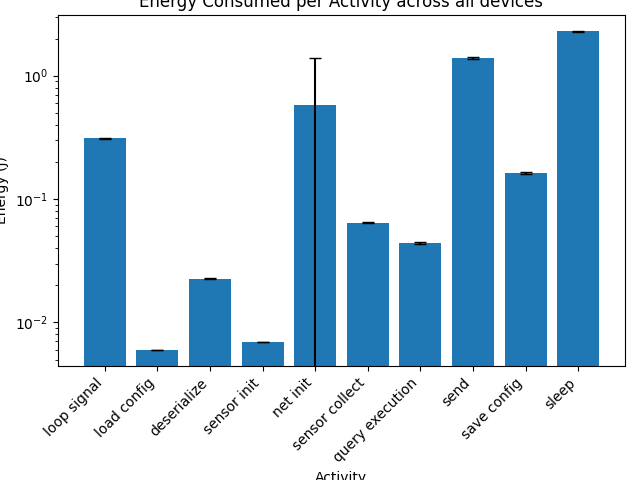

In [ ]:
# plot barchart without totals 
plt.figure()
to_plot = energy_consumed_summary[["loop signal", "load config", "deserialize", "sensor init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]]
error_relative = np.abs(error_bounds[["loop signal", "load config", "deserialize", "sensor init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]] - to_plot.loc["mean"])
plt.bar(to_plot.columns, to_plot.loc["mean"], yerr=error_relative, log=True, capsize=4)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.xlabel("Activity")
plt.ylabel("Energy (J)")
plt.title("Energy Consumed per Activity across all devices")
plt.show()

In [ ]:
# plot barchart without totals and without the 0th loop
# recalc summary without 0 loops
without_0th_loop = loops[loops["loop_num"] > 0].apply(calc_energy_consumed_per_activity, axis=1)
without_0th_loop_summary = without_0th_loop.describe()

In [ ]:
error_bounds_without_0th_loop = without_0th_loop[["total", "total without loop signal", "loop signal", "load config", "deserialize", "sensor init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]].apply(calc_confidence_interval)


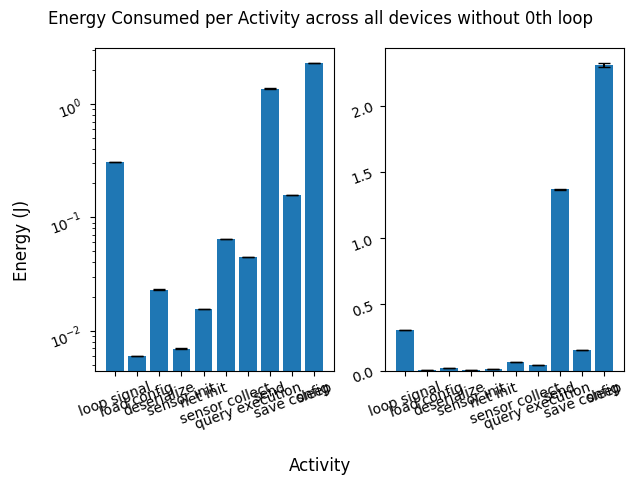

In [ ]:
to_plot = without_0th_loop_summary[["loop signal", "load config","deserialize", "sensor init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]]

errors_relative = np.abs(error_bounds_without_0th_loop[["loop signal", "load config","deserialize", "sensor init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]] - to_plot.loc["mean"])
#energy_consumed_without_0th_loop
## plot both with log scale and without
fig, (ax1, ax2) =  plt.subplots(1,2)

fig.suptitle("Energy Consumed per Activity across all devices without 0th loop")
fig.supxlabel("Activity")
fig.supylabel("Energy (J)")

ax1.bar(to_plot.columns, to_plot.loc["mean"], yerr=errors_relative, capsize=4, log=True)
ax1.tick_params(labelrotation=20)

ax2.bar(to_plot.columns, to_plot.loc["mean"], yerr=errors_relative, capsize=4)
ax2.tick_params(labelrotation=20)



plt.tight_layout()
plt.show()

In [ ]:
without_0th_loop.groupby("node_id").describe()

loop_num                                                  \
                    count  mean        std  min    25%   50%    75%   max   
node_id                                                                     
70B3D57ED005EA59     70.0  35.5  20.351085  1.0  18.25  35.5  52.75  70.0   
70B3D57ED005EA61     66.0  33.5  19.196354  1.0  17.25  33.5  49.75  66.0   
70B3D57ED005EA63     62.0  31.5  18.041619  1.0  16.25  31.5  46.75  62.0   
70B3D57ED005EA64     30.0  15.5   8.803408  1.0   8.25  15.5  22.75  30.0   
70B3D57ED005EA65     48.0  24.5  14.000000  1.0  12.75  24.5  36.25  48.0   
70B3D57ED005EA74     37.0  19.0  10.824355  1.0  10.00  19.0  28.00  37.0   

                 total            ... save config           sleep            \
                 count      mean  ...         75%       max count      mean   
node_id                           ...                                         
70B3D57ED005EA59  70.0  4.348163  ...    0.159573  0.161469  70.0  2.386426   
70B3D57ED005EA61  66.0  4.321930  ...    0.159410  0.160635  66.0  2.296299   
70B3D57ED005EA63  62.0  4.339793  ...    0.161322  0.162721  62.0  2.306722   
70B3D57ED005EA64  30.0  4.260848  ...    0.158312  0.160645  30.0  2.256973   
70B3D57ED005EA65  48.0  4.127741  ...    0.153876  0.155649  48.0  2.180923   
70B3D57ED005EA74  37.0  4.396483  ...    0.160232  0.161936  37.0  2.347351   

                                                                              
                       std       min       25%       50%       75%       max  
node_id                                                                       
70B3D57ED005EA59  0.119529  2.290096  2.302726  2.311964  2.551491  2.584746  
70B3D57ED005EA61  0.008090  2.283009  2.289807  2.296671  2.303143  2.315657  
70B3D57ED005EA63  0.146469  1.175322  2.315972  2.324246  2.335150  2.347878  
70B3D57ED005EA64  0.131694  1.564219  2.268102  2.280743  2.290302  2.315392  
70B3D57ED005EA65  0.191382  0.883905  2.202038  2.207789  2.213087  2.226800  
70B3D57ED005EA74  0.009501  2.330652  2.340186  2.346961  2.353582  2.364436  

[6 rows x 104 columns]

In [ ]:
## plot per node
grouped = without_0th_loop[["node_id","loop signal", "load config", "deserialize", "sensor init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]] \
    .groupby("node_id")
# grouped_agg = grouped.agg(["mean", "std"])
# def hej(row: pd.Series):
#     outermost_column = list(set(k[0] for k in row.keys()))
#     idx = pd.MultiIndex.from_product([outermost_column, ["low","high"]])
#     res = pd.Series(index=idx)
#     for col in outermost_column:
#         res[col] = calc_confidence_interval(row[col])
#     return res
# ci = grouped_agg.apply(hej, axis=1)

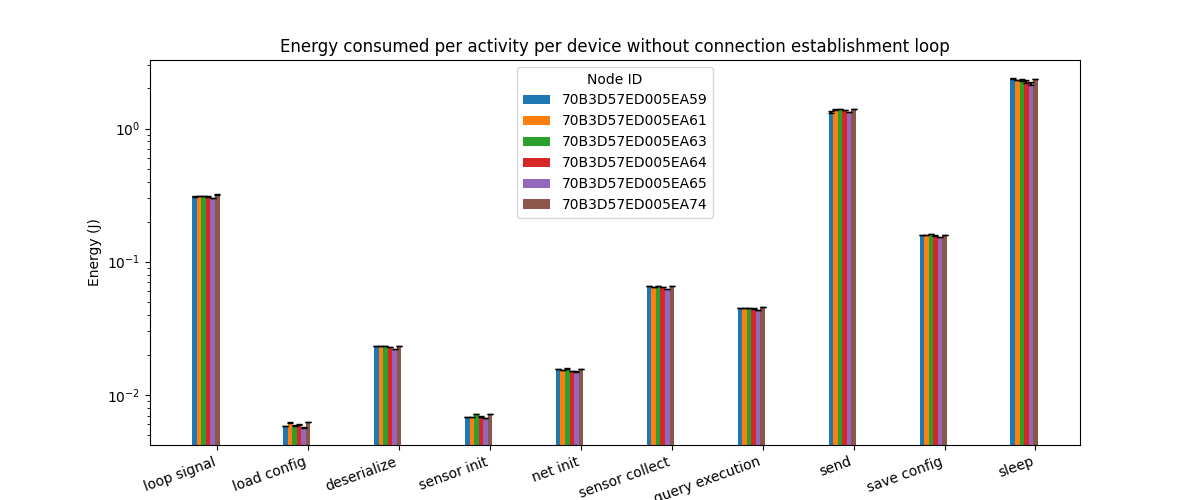

In [ ]:
columns = ["loop signal", "load config", "deserialize", "sensor init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]
locations = np.arange(len(columns))
width = 0.05
multiplier = 0
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
for node_id, row in grouped:
    values = row[columns].mean().values
    error_bounds = row[columns].apply(calc_confidence_interval)
    errors_relative = np.abs(error_bounds - values)
    #values = row.loc[node_id,(slice(None),"mean")][["loop signal", "load config", "deserialize", "sensor init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]].values
    #errors_low = values - ci.loc[node_id,(slice(None),"low")][["loop signal", "load config", "deserialize", "sensor init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]]
    #errors_high = ci.loc[node_id,(slice(None),"high")][["loop signal", "load config", "deserialize", "sensor init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]] - values
    # for node_id, mean in row.loc[activity,"mean"].items():
    offset = width * multiplier

    rects = ax.bar(locations + offset, values, width, capsize=2, label=node_id, yerr=errors_relative, log=True)
    #ax.bar_label(rects, padding=3)
    multiplier += 1
ax.legend(title="Node ID")
ax.set_title("Energy consumed per activity per device without connection establishment loop")
ax.set_ylabel("Energy (J)")
ax.set_xlabel("Activity")
ax.set_xticks(locations + 0.25, columns, rotation=20, ha="right")
plt.show()

In [ ]:
import gc
gc.collect()

1896

In [ ]:

#TODO: vis distribution over query execution means
# IFT: 2 modaliteter: selectivity på filtre. lav exp med forskl. selectivity og regression til cost model
# størrelse af query: save cost afhænger af query størrelse

# TODO: from Viktor
# before doing the above try to from the data you have derive a power consumption per time period and estimate the powerconsumption linearly based on the time the activity takes
# regarding outliars in the total plot. Remove them. 
